# Demo 1: Fractals (Part 1)

In [2]:
import numpy as np
import torch

In [3]:
print("PyTorch Version :\t", torch.__version__)
print("CUDA Available? :\t", torch.cuda.is_available())

PyTorch Version :	 2.0.1+cu118
CUDA Available? :	 True


In [4]:
# Grid for computing image, subdivide the space
X, Y = np.mgrid[-4:4:0.01, -4:4:0.01]

# Load into PyTorch tensors
x = torch.Tensor(X)
y = torch.Tensor(Y)

# Transfer to the GPU device
x = x.to("cuda")
y = y.to("cuda")

# Compute Gaussian
z = torch.exp(-(x**2 + y**2) / 2)

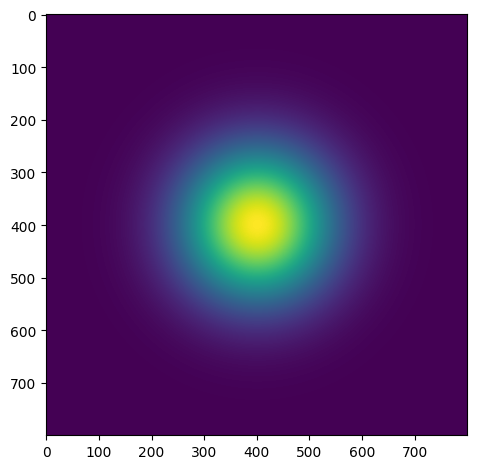

In [5]:
# Plot
import matplotlib.pyplot as plt

plt.imshow(z.to("cpu"))
plt.tight_layout()
plt.show()

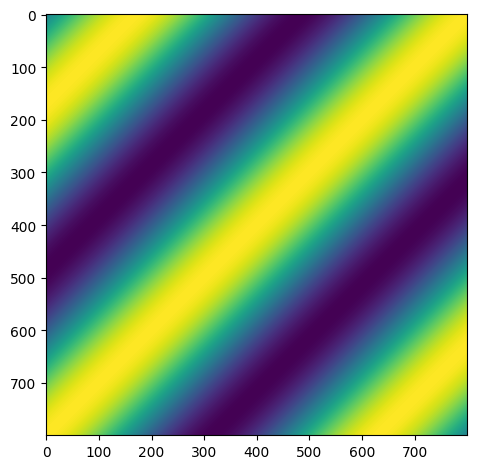

In [104]:
# Compute 2D sine function
A = 1
B = 1
C = 1
D = torch.pi

s = A * torch.sin(B*x + C*y + D)

plt.imshow(s.to("cpu"))
plt.tight_layout()
plt.show()

An explanation of the various constant:
- $A$: determines the amplitude of the 2D sine (though this has no effect on the visualisation, which is coloured in a normalised fashion)

- $C/B$: gives the gradient of the bands

- $D$: translates the bands in a direction perpendicular to the banding, in a periodic fasion with period $2\pi$

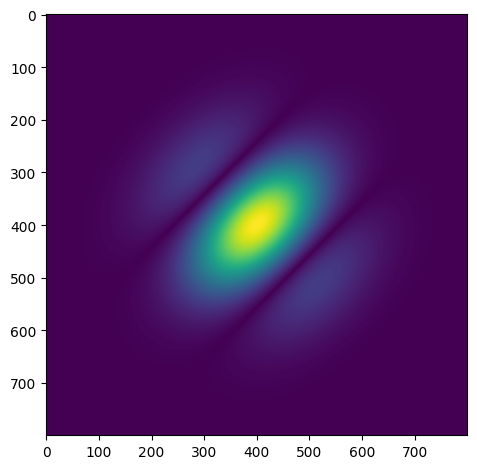

In [105]:
# Construct Gabor filter by multiplying Gaussian with sine
g = z * s

plt.imshow(g.abs().to("cpu"))
plt.tight_layout()
plt.show()

- Gabor filter is a linear filter used for texture analysis

- Extracts frequency content perpendicular to the bands in a localised region

- Suggested to be similar to human vision perception